#IMPORT# Í∏∞Î≥∏ Î∞è ÌïúÍ∏Ä ÏÑ§Ï†ï

In [1]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# ÎßëÏùÄ Í≥†Îîï ÏÑ§Ï†ï
plt.rc('font', family='Malgun Gothic')  # Windows
# plt.rc('font', family='AppleGothic')  # macOS
# plt.rc('font', family='NanumGothic')  # Linux (Colab Îì±ÏóêÏÑú)

# ÎßàÏù¥ÎÑàÏä§ Íπ®Ïßê Î∞©ÏßÄ
plt.rcParams['axes.unicode_minus'] = False

#ÌååÏùº Input#

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

#ÌäπÏÑ±Í≥º ÌÉÄÍ≤ü Î≥ÄÏàò Î∂ÑÎ¶¨
train = train.drop(columns=['ID'], axis = 1)
test = test.drop(columns=['ID'], axis = 1)

In [3]:
print(train.info())
print(train.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4376 entries, 0 to 4375
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ÏÑ§Î¶ΩÏó∞ÎèÑ            4376 non-null   int64  
 1   Íµ≠Í∞Ä              4376 non-null   object 
 2   Î∂ÑÏïº              3519 non-null   object 
 3   Ìà¨ÏûêÎã®Í≥Ñ            4376 non-null   object 
 4   ÏßÅÏõê Ïàò            4202 non-null   float64
 5   Ïù∏ÏàòÏó¨Î∂Ä            4376 non-null   object 
 6   ÏÉÅÏû•Ïó¨Î∂Ä            4376 non-null   object 
 7   Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)        3056 non-null   float64
 8   Ï¥ù Ìà¨ÏûêÍ∏à(ÏñµÏõê)       4376 non-null   float64
 9   Ïó∞Îß§Ï∂ú(ÏñµÏõê)         4376 non-null   float64
 10  SNS ÌåîÎ°úÏõå Ïàò(Î∞±ÎßåÎ™Ö)  4376 non-null   float64
 11  Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)       3156 non-null   object 
 12  ÏÑ±Í≥µÌôïÎ•†            4376 non-null   float64
dtypes: float64(6), int64(1), object(6)
memory usage: 444.6+ KB
None
              ÏÑ§Î¶ΩÏó∞ÎèÑ       

Îç∞Ïù¥ÌÑ∞ Ïù∏Ìíã Ï¢ãÏùå
Í≤∞Ï∏°Ïπò ÌôïÏù∏

MissingCount  MissingRatio
Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)                1320      0.301645
Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)               1220      0.278793
Î∂ÑÏïº                       857      0.195841
ÏßÅÏõê Ïàò                     174      0.039762
ÏÑ§Î¶ΩÏó∞ÎèÑ                       0      0.000000
Ìà¨ÏûêÎã®Í≥Ñ                       0      0.000000
Íµ≠Í∞Ä                         0      0.000000
ÏÉÅÏû•Ïó¨Î∂Ä                       0      0.000000
Ïù∏ÏàòÏó¨Î∂Ä                       0      0.000000
Ï¥ù Ìà¨ÏûêÍ∏à(ÏñµÏõê)                  0      0.000000
Ïó∞Îß§Ï∂ú(ÏñµÏõê)                    0      0.000000
SNS ÌåîÎ°úÏõå Ïàò(Î∞±ÎßåÎ™Ö)             0      0.000000
ÏÑ±Í≥µÌôïÎ•†                       0      0.000000

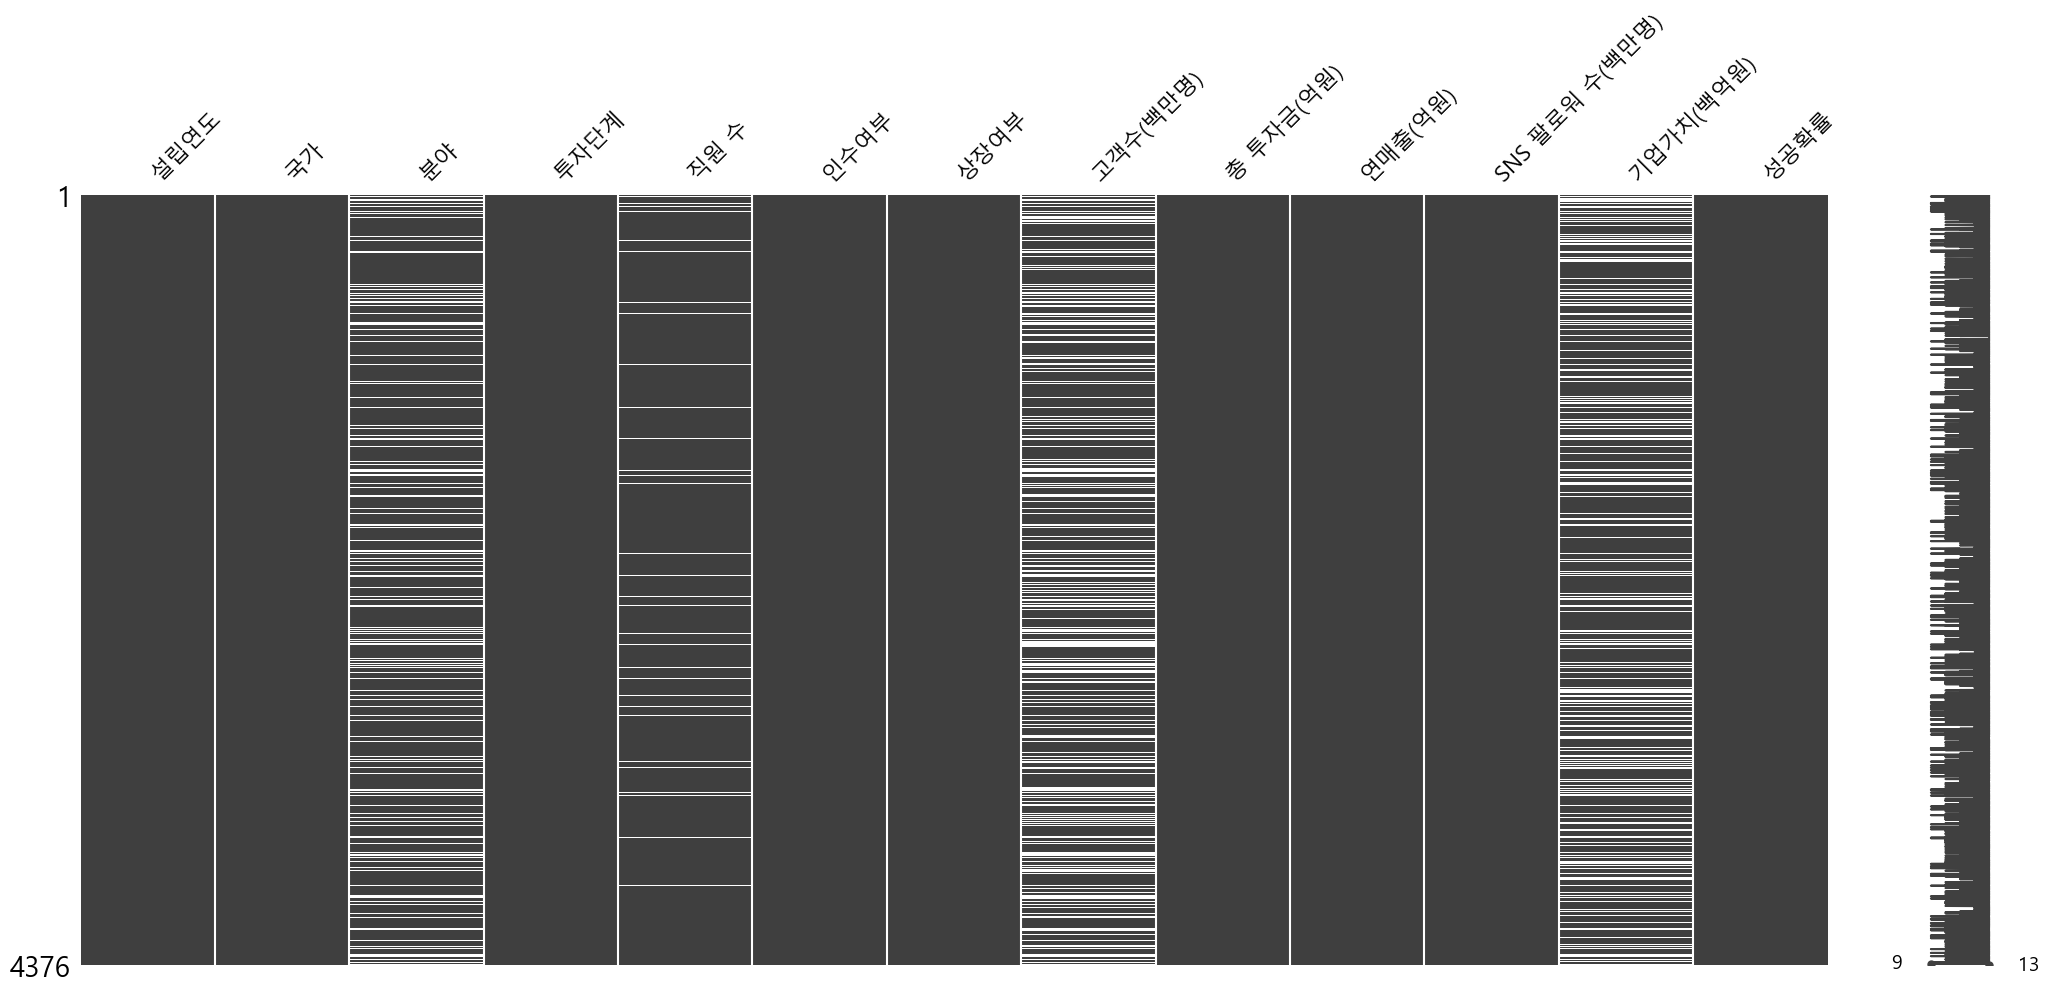

In [4]:
import missingno as msno
msno.matrix(train)  # ÎòêÎäî msno.heatmap(train)
# Í≤∞Ï∏°Ïπò Í∞úÏàò ÌôïÏù∏
missing_counts = train.isnull().sum()

# Í≤∞Ï∏°Ïπò ÎπÑÏú®ÍπåÏßÄ Ìï®Íªò Î≥¥Í∏∞
missing_info = pd.DataFrame({
    "MissingCount": missing_counts,
    "MissingRatio": missing_counts / len(train)
}).sort_values(by="MissingRatio", ascending=False)

missing_info

Í≤∞Ï∏°Ïù¥ ÎßéÏùÄ Í≥≥
Î≤îÏ£ºÌòï : Î∂ÑÏïº
ÏàòÏπòÌòï : ÏßÅÏõêÏàò, Í≥†Í∞ùÏàò, Í∏∞ÏóÖÍ∞ÄÏπò
------
ÏùºÎ∂ÄÏª¨ÎüºÏùÄ ÎèôÏãúÏóê Í≤∞Ï∏°(Í≥†Í∞ùÏàò, Í∏∞ÏóÖÍ∞ÄÏπò, ÏßÅÏõêÏàò) --> Îã§Î≥ÄÎüâ Î≥¥Í∞Ñ or Î™®Îç∏ Í∏∞Î∞ò Î≥¥Í∞Ñ

1. Î≤îÏ£ºÌòï Î®ºÏ†Ä Ï≤òÎ¶¨
2. ÏàòÏπòÌòïÏùÄ Îã§Î≥ÄÎüâ Î≥¥Í∞Ñ or Í≤∞Ï∏° ÌîåÎûòÍ∑∏

Ïª¨Îüº	    Í≤∞Ï∏° Ïàò	    ÎπÑÏú®
Í≥†Í∞ùÏàò	    1,320	    30.2%       - Í≥†Í∞ù Ïàò,ÏßÅÏõê Ïàò, Ïó∞Îß§Ï∂ú, Ï¥ù Ìà¨ÏûêÍ∏à, SNS Ïàò..
Í∏∞ÏóÖÍ∞ÄÏπò	1,220	    27.9%       - ÏßÅÏõêÏàò, Î∂ÑÏïº, Ïó∞Îß§Ï∂ú..
Î∂ÑÏïº	    857         19.6%       - ÏòàÏ∏°Î≥¥Îã§ UnknownÏúºÎ°ú ÎåÄÏ≤¥ ÎùºÎ≤® Ïù∏ÏΩîÎî©
ÏßÅÏõê Ïàò	    174	        4.0%        - ÏÑ§Î¶ΩÏó∞ÎèÑ, Íµ≠Í∞Ä, Ìà¨ÏûêÎã®Í≥Ñ, Ïó∞Îß§Ï∂ú, Ï¥ù Ìà¨ÏûêÍ∏à..

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor

In [6]:
# Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê) Ïà´ÏûêÌôî
# Í∏∞ÏóÖÍ∞ÄÏπò Ïª¨ÎüºÎèÑ Î≤îÏúÑ Î¨∏ÏûêÏó¥ Ï≤òÎ¶¨ Ï∂îÍ∞Ä

def convert_range_to_float(value):
    if isinstance(value, str) and '-' in value:
        try:
            low, high = map(float, value.split('-'))
            return (low + high) / 2
        except:
            return np.nan
    try:
        return float(value)
    except:
        return np.nan
    
def encode_categoricals(df, cols):
    df = df.copy()
    for col in cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
    return df

def fill_missing_values_v3(df, is_train=True):
    df = df.copy()

    # Î≤îÏúÑ Î¨∏ÏûêÏó¥ ‚Üí ÌèâÍ∑† Ïà´Ïûê Ï≤òÎ¶¨
    for col in ['Ïó∞Îß§Ï∂ú(ÏñµÏõê)', 'Ï¥ù Ìà¨ÏûêÍ∏à(ÏñµÏõê)', 'Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)']:
        df[col] = df[col].apply(convert_range_to_float)

    # Î∂ÑÏïº Í≤∞Ï∏° Î∞è Ïù∏ÏΩîÎî©
    if 'Î∂ÑÏïº' in df.columns:
        df['Î∂ÑÏïº'] = df['Î∂ÑÏïº'].fillna('Unknown')
        df['Î∂ÑÏïº'] = LabelEncoder().fit_transform(df['Î∂ÑÏïº'])

    # Íµ≠Í∞Ä, Ìà¨ÏûêÎã®Í≥Ñ Ïù∏ÏΩîÎî©
    df = encode_categoricals(df, ['Íµ≠Í∞Ä', 'Ìà¨ÏûêÎã®Í≥Ñ'])

    # ‚úÖ Í≤∞Ï∏° ÌîåÎûòÍ∑∏ Ï∂îÍ∞Ä Ìï®Ïàò
    def add_missing_flag(column):
        flag_col = f'{column}_Í≤∞Ï∏°'
        df[flag_col] = df[column].isnull().astype(int)

    # ‚úÖ ÌîºÏ≤òÏÖã ÏÉùÏÑ± Ìï®Ïàò
    def get_features(base):
        return base + (['ÏÑ±Í≥µÌôïÎ•†'] if is_train else [])

    # 1. ÏßÅÏõê Ïàò
    if 'ÏßÅÏõê Ïàò' in df.columns:
        add_missing_flag('ÏßÅÏõê Ïàò')
        features = get_features(['ÏÑ§Î¶ΩÏó∞ÎèÑ', 'Íµ≠Í∞Ä', 'Ìà¨ÏûêÎã®Í≥Ñ', 'Ïó∞Îß§Ï∂ú(ÏñµÏõê)', 'Ï¥ù Ìà¨ÏûêÍ∏à(ÏñµÏõê)', 'SNS ÌåîÎ°úÏõå Ïàò(Î∞±ÎßåÎ™Ö)'])
        complete = df[df['ÏßÅÏõê Ïàò'].notnull()]
        missing = df[df['ÏßÅÏõê Ïàò'].isnull()]
        if not complete.empty and not missing.empty:
            model = GradientBoostingRegressor()
            model.fit(complete[features], complete['ÏßÅÏõê Ïàò'])
            df.loc[df['ÏßÅÏõê Ïàò'].isnull(), 'ÏßÅÏõê Ïàò'] = model.predict(missing[features])

    # 2. Í≥†Í∞ù Ïàò
    if 'Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)' in df.columns:
        add_missing_flag('Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)')
        features = get_features(['ÏÑ§Î¶ΩÏó∞ÎèÑ', 'ÏßÅÏõê Ïàò', 'Î∂ÑÏïº', 'Ïó∞Îß§Ï∂ú(ÏñµÏõê)', 'Ï¥ù Ìà¨ÏûêÍ∏à(ÏñµÏõê)', 'SNS ÌåîÎ°úÏõå Ïàò(Î∞±ÎßåÎ™Ö)'])
        complete = df[df['Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)'].notnull()]
        missing = df[df['Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)'].isnull()]
        if not complete.empty and not missing.empty:
            model = GradientBoostingRegressor()
            model.fit(complete[features], complete['Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)'])
            df.loc[df['Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)'].isnull(), 'Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)'] = model.predict(missing[features])

    # 3. Í∏∞ÏóÖÍ∞ÄÏπò
    if 'Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)' in df.columns:
        add_missing_flag('Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)')
        features = get_features(['ÏÑ§Î¶ΩÏó∞ÎèÑ', 'ÏßÅÏõê Ïàò', 'Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)', 'Î∂ÑÏïº', 'Ïó∞Îß§Ï∂ú(ÏñµÏõê)', 'Ï¥ù Ìà¨ÏûêÍ∏à(ÏñµÏõê)', 'SNS ÌåîÎ°úÏõå Ïàò(Î∞±ÎßåÎ™Ö)'])
        complete = df[df['Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)'].notnull()]
        missing = df[df['Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)'].isnull()]
        if not complete.empty and not missing.empty:
            model = GradientBoostingRegressor()
            model.fit(complete[features], complete['Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)'])
            df.loc[df['Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)'].isnull(), 'Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)'] = model.predict(missing[features])

    return df

# ÏµúÏ¢Ö Í≤∞Ï∏°Ïπò Î≥¥Í∞Ñ ÏãúÎèÑ
train_filled = fill_missing_values_v3(train, is_train=True)
train_filled.isnull().sum()  # Î™®Îì† Í≤∞Ï∏°ÏπòÍ∞Ä Ïûò Ï±ÑÏõåÏ°åÎäîÏßÄ ÌôïÏù∏

test_filled = fill_missing_values_v3(test, is_train=False)
test_filled.isnull().sum()  # Î™®Îì† Í≤∞Ï∏°ÏπòÍ∞Ä Ïûò Ï±ÑÏõåÏ°åÎäîÏßÄ ÌôïÏù∏




ÏÑ§Î¶ΩÏó∞ÎèÑ              0
Íµ≠Í∞Ä                0
Î∂ÑÏïº                0
Ìà¨ÏûêÎã®Í≥Ñ              0
ÏßÅÏõê Ïàò              0
Ïù∏ÏàòÏó¨Î∂Ä              0
ÏÉÅÏû•Ïó¨Î∂Ä              0
Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)          0
Ï¥ù Ìà¨ÏûêÍ∏à(ÏñµÏõê)         0
Ïó∞Îß§Ï∂ú(ÏñµÏõê)           0
SNS ÌåîÎ°úÏõå Ïàò(Î∞±ÎßåÎ™Ö)    0
Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)         0
ÏßÅÏõê Ïàò_Í≤∞Ï∏°           0
Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)_Í≤∞Ï∏°       0
Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)_Í≤∞Ï∏°      0
dtype: int64

Í≤∞Ï∏°flag -> features engineering, Î™®Îç∏ÏÑ†ÌÉù Î∞è ÌïôÏäµ

In [7]:
print(train_filled.info())
print(train_filled.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4376 entries, 0 to 4375
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ÏÑ§Î¶ΩÏó∞ÎèÑ            4376 non-null   int64  
 1   Íµ≠Í∞Ä              4376 non-null   int64  
 2   Î∂ÑÏïº              4376 non-null   int64  
 3   Ìà¨ÏûêÎã®Í≥Ñ            4376 non-null   int64  
 4   ÏßÅÏõê Ïàò            4376 non-null   float64
 5   Ïù∏ÏàòÏó¨Î∂Ä            4376 non-null   object 
 6   ÏÉÅÏû•Ïó¨Î∂Ä            4376 non-null   object 
 7   Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)        4376 non-null   float64
 8   Ï¥ù Ìà¨ÏûêÍ∏à(ÏñµÏõê)       4376 non-null   float64
 9   Ïó∞Îß§Ï∂ú(ÏñµÏõê)         4376 non-null   float64
 10  SNS ÌåîÎ°úÏõå Ïàò(Î∞±ÎßåÎ™Ö)  4376 non-null   float64
 11  Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)       4376 non-null   float64
 12  ÏÑ±Í≥µÌôïÎ•†            4376 non-null   float64
 13  ÏßÅÏõê Ïàò_Í≤∞Ï∏°         4376 non-null   int64  
 14  Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)_Í≤∞Ï∏°     4376 non-n

Í∏∞ÏóÖÍ∞ÄÏπò_Í≤∞Ï∏°: ÌèâÍ∑† ~0.41 ‚Üí ÏïΩ 41% Í≤∞Ï∏° ‚Üí ÌîåÎûòÍ∑∏ Ï§ëÏöîÌï† Í∞ÄÎä•ÏÑ± ÎÜíÏùå
Ïù∏ÏàòÏó¨Î∂Ä, ÏÉÅÏû•Ïó¨Î∂ÄÎ•º Label Encoding ÎòêÎäî Î∂àÎ¶¨Ïñ∏Ìôî
ÌòÑÏû¨ object ÌÉÄÏûÖÏù¥Îùº Î™®Îç∏ÎßÅ Ï†ÑÏóê Ï≤òÎ¶¨ ÌïÑÏöî

Í≤∞Ï∏° ÌîåÎûòÍ∑∏ÏôÄ Í∏∞Ï°¥ Î≥ÄÏàò Í∞ÑÏùò ÏÉÅÍ¥ÄÏÑ± ÌôïÏù∏ (EDA)
Ïòà: Í∏∞ÏóÖÍ∞ÄÏπò_Í≤∞Ï∏° == 1Ïù∏ Í∏∞ÏóÖÏùÄ ÏÑ±Í≥µÌôïÎ•†Ïù¥ ÎÇÆÏùÄÍ∞Ä?

Feature Importance Ïã§Ìóò Ïãú ÌîåÎûòÍ∑∏ Ìè¨Ìï®Ìïú Î≤ÑÏ†ÑÍ≥º ÏïÑÎãå Î≤ÑÏ†Ñ ÎπÑÍµê

Series([], dtype: object)
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000189 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1574
[LightGBM] [Info] Number of data points in the train set: 4376, number of used features: 15
[LightGBM] [Info] Start training from score 0.537340


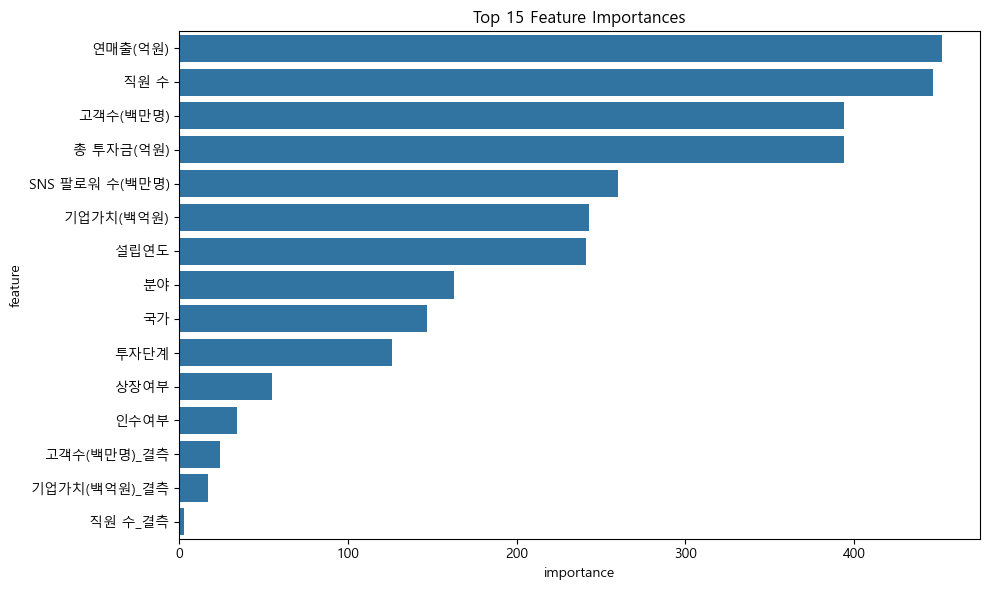

In [8]:
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns

# 1. ÌîºÏ≤ò Î∞è ÌÉÄÍ≤ü ÏÑ§Ï†ï
feature_cols = [col for col in train_filled.columns if col not in ['ÏÑ±Í≥µÌôïÎ•†']]
target_col = 'ÏÑ±Í≥µÌôïÎ•†'

X = train_filled[feature_cols].copy()
y = train_filled[target_col].copy()

for col in X.select_dtypes(include='object').columns:
    if set(X[col].unique()) <= {'Yes', 'No'}:
        X[col] = X[col].map({'No': 0, 'Yes': 1})
print(X.dtypes[X.dtypes == 'object'])         
# 2. Î™®Îç∏ ÌõàÎ†®
model = lgb.LGBMRegressor()
model.fit(X, y)

# 3. Feature Importance Ï∂îÏ∂ú
importance_df = pd.DataFrame({
    'feature': feature_cols,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=False)

# 4. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=importance_df.head(15))
plt.title('Top 15 Feature Importances')
plt.tight_layout()
plt.show()


‚úÖ ÏôÑÎ£åÌïú Îã®Í≥Ñ:
Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
‚Üí train_filled ÌôïÏù∏ Î∞è Í≤∞Ï∏°Ïπò Î≥¥Í∞Ñ Ï†ÑÎûµ ÏàòÎ¶Ω

Î™©Ìëú ÌôïÏù∏
‚Üí ÌöåÍ∑ÄÎ¨∏Ï†úÎ°úÏÑú 'ÏÑ±Í≥µÌôïÎ•†' ÏòàÏ∏°ÏúºÎ°ú Î™ÖÌôïÌûà ÏÑ§Ï†ïÎê®

Í≤∞Ï∏°Ïπò ÌôïÏù∏ Î∞è Ï≤òÎ¶¨
‚Üí LightGBM, IterativeImputer, Ï§ëÍ∞ÑÍ∞í, 'Unknown' Îì±ÏúºÎ°ú Ï≤òÎ¶¨ ÏôÑÎ£å

EDA (ÏãúÍ∞ÅÌôî Ìè¨Ìï®Ìïú ÌÉêÏÉâÏ†Å Î∂ÑÏÑù)
‚Üí Î∂ÄÎ∂ÑÏ†ÅÏúºÎ°ú ÏßÑÌñâ (feature importance ÏãúÍ∞ÅÌôî Ìè¨Ìï®)

Ïª¨ÎüºÎ≥Ñ Î∂ÑÏÑù + Ïù¥ÏÉÅÏπò ÌÉêÏÉâ
‚Üí ÏùºÎ∂Ä ÏßÑÌñâÎê® (Î∂ÑÌè¨ ÌôïÏù∏, Í≤∞Ï∏°Ïπò ÎπÑÏú® Îì±), Í∑∏Îü¨ÎÇò ÏãúÍ∞ÅÌôî Ï§ëÏã¨ Ïù¥ÏÉÅÏπò ÌÉêÏÉâÏùÄ ÎØ∏ÏôÑ

Îç∞Ïù¥ÌÑ∞ ÎùºÎ≤®ÎßÅ Î∞è Î∂àÎ¶¨Ïñ∏Ìôî
‚Üí 'Y/N' ‚Üí 1/0 Î≥ÄÌôò ÏôÑÎ£å

ÌïÑÏöîÏóÜÎäî Ïª¨Îüº Ï†úÍ±∞
‚Üí 'ÏÑ±Í≥µÌôïÎ•†' Ï†úÏô∏ÌïòÍ≥† Î™®Îç∏ÎßÅÏö© Ïª¨Îüº Íµ¨ÏÑ± ÏôÑÎ£å

Feature Engineering (ÌååÏÉùÎ≥ÄÏàò ÏÉùÏÑ±)
‚Üí _Í≤∞Ï∏° ÌååÏÉù, Í∏∞Ï°¥ Î≥ÄÏàò ÌôúÏö© Îì± ÏùºÎ∂Ä ÏßÑÌñâ, Ï∂îÍ∞Ä ÌôïÏû• Ïó¨ÏßÄ ÏûàÏùå

Feature Importance / ÏÉÅÍ¥Ä Î∂ÑÏÑù
‚Üí LGBMÏùÑ ÌÜµÌïú Feature Importance ÏôÑÎ£å, ÏÉÅÍ¥Ä Î∂ÑÏÑùÏùÄ ÎØ∏ÏßÑÌñâ

üîú Îã§Ïùå Îã®Í≥ÑÎ°ú Ïù¥Ïñ¥Ïßà Ïàò ÏûàÎäî Í±¥:
Í≤ÄÏ¶ù Ï†ÑÎûµ ÏÑ§Ï†ï (KFold Îì±)
‚Üí Î™®Îç∏ ÌèâÍ∞Ä ÏïàÏ†ïÏÑ±ÏùÑ ÏúÑÌï¥ ÏïÑÏßÅ ÌïÑÏàòÎ°ú ÌïÑÏöî

Î™®Îç∏ ÏÑ†ÌÉù Î∞è ÌïôÏäµ
‚Üí ÌòÑÏû¨ LightGBMÎßå ÏÇ¨Ïö©, TabNet, XGBoost Îì± Ï∂îÍ∞Ä Í∞ÄÎä•

ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù
‚Üí Í∏∞Î≥∏ ÌååÎùºÎØ∏ÌÑ∞Î°úÎßå ÌïôÏäµ ‚Üí ÏïÑÏßÅ ÎØ∏ÏôÑÎ£å

ÏµúÏ¢Ö Î™®Îç∏ ÏÑ†Ï†ï
‚Üí Ïó¨Îü¨ Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê Î∞è Í≤∞Ï†ï ÌïÑÏöî

Í≤∞Í≥º ÏòàÏ∏° Î∞è Ï†ÄÏû•
‚Üí Test Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏° Ï†ÄÏû•ÏùÄ ÏïÑÏßÅ ÏóÜÏùå

ÌèâÍ∞Ä ÏßÄÌëú ÌôïÏù∏ Î∞è ÎåÄÌöå Ï†úÏ∂ú
‚Üí ÌèâÍ∞Ä ÏßÄÌëú ÌôïÏù∏/Í≥ÑÏÇ∞ Î∞è Ï†úÏ∂ú Í≥ºÏ†ïÏùÄ ÎØ∏ÏßÑÌñâ

#Ïù¥ÏÉÅÏπòÌÉêÏÉâ
‚úÖ Ïù¥ÏÉÅÏπò ÌÉêÏÉâ Î∞©Î≤ï ÏöîÏïΩ

Î∞©Î≤ï	ÏÑ§Î™Ö	ÏòàÏãú
IQR (ÏÇ¨Î∂ÑÏúÑÏàò Î≤îÏúÑ)	Î≤îÏúÑÎ•º Î≤óÏñ¥ÎÇòÎäî Í∞íÏùÑ Ïù¥ÏÉÅÏπòÎ°ú Í∞ÑÏ£º	ÏàòÏπòÌòï Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤¥Ïóê Ï†ÅÏö© Í∞ÄÎä•
Z-score / Standard score	ÌèâÍ∑†ÏóêÏÑú ÏñºÎßàÎÇò Îñ®Ïñ¥Ï†∏ ÏûàÎäîÏßÄ Í≥ÑÏÇ∞ (Ï†ïÍ∑ú Î∂ÑÌè¨ Ï†ÑÏ†ú)	z > 3 or z < -3
Boxplot ÏãúÍ∞ÅÌôî	ÏãúÍ∞ÅÏ†ÅÏúºÎ°ú Í∑πÎã®Í∞í ÌôïÏù∏	sns.boxplot
Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî	histplot, kdeplot Îì±ÏúºÎ°ú ÌôïÏù∏	Î°úÍ∑∏ Î≥ÄÌôòÎèÑ Î≥ëÌñâ
Isolation Forest / LOF	Î™®Îç∏ Í∏∞Î∞ò Ïù¥ÏÉÅÏπò ÌÉêÏßÄ (Í≥†Ï∞®Ïõê Í∞ÄÎä•)	ÎßéÏùÄ Î≥ÄÏàòÏóêÏÑú Ï†ÅÏö© Í∞ÄÎä•

['ÏÑ§Î¶ΩÏó∞ÎèÑ', 'Íµ≠Í∞Ä', 'Î∂ÑÏïº', 'Ìà¨ÏûêÎã®Í≥Ñ', 'ÏßÅÏõê Ïàò', 'Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)', 'Ï¥ù Ìà¨ÏûêÍ∏à(ÏñµÏõê)', 'Ïó∞Îß§Ï∂ú(ÏñµÏõê)', 'SNS ÌåîÎ°úÏõå Ïàò(Î∞±ÎßåÎ™Ö)', 'Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)', 'ÏÑ±Í≥µÌôïÎ•†', 'ÏßÅÏõê Ïàò_Í≤∞Ï∏°', 'Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)_Í≤∞Ï∏°', 'Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)_Í≤∞Ï∏°']


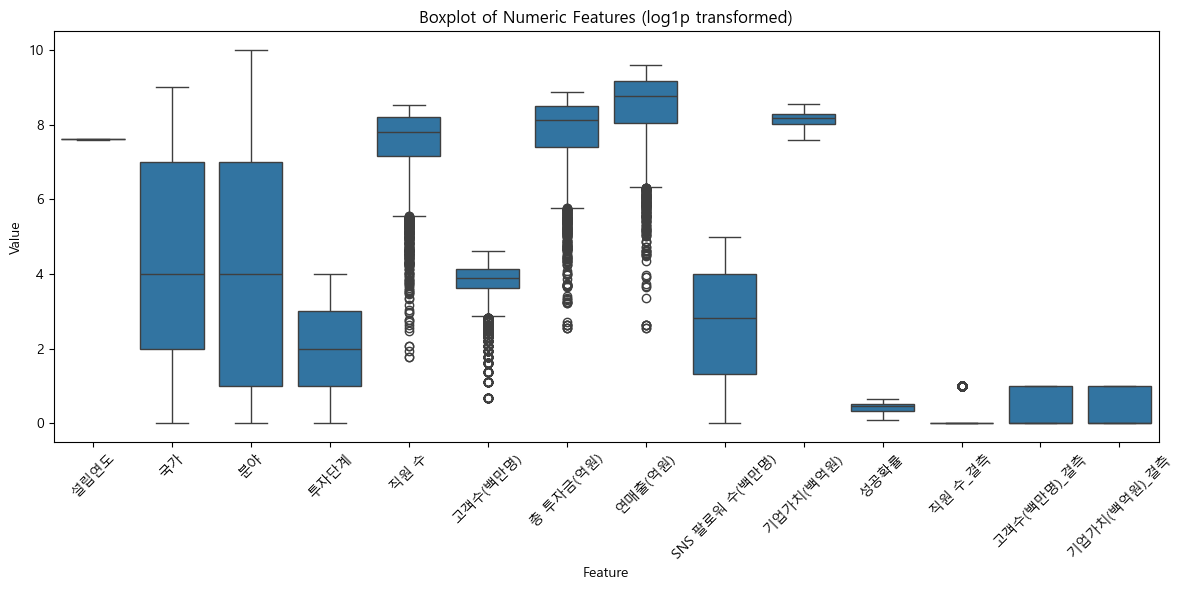

In [9]:
def detect_outliers_summary(df, columns):
    summary = []
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        summary.append({
            'Ïª¨ÎüºÎ™Ö': col,
            'Ïù¥ÏÉÅÏπò Ïàò': len(outliers),
            'Ï†ÑÏ≤¥ ÎåÄÎπÑ ÎπÑÏú®(%)': round(len(outliers) / len(df) * 100, 2)
        })
    return pd.DataFrame(summary).sort_values(by='Ïù¥ÏÉÅÏπò Ïàò', ascending=False)

# log Î≥ÄÌôò (0Î≥¥Îã§ ÌÅ∞ Í∞íÎßå Î≥ÄÌôò, log1pÎäî log(1+x))
num_cols = train_filled.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(num_cols)
log_train = train_filled[num_cols].copy()
for col in num_cols:
    if (log_train[col] > 0).all():  # ÏùåÏàò, 0 ÏûàÎäî Ïª¨ÎüºÏùÄ Ï†úÏô∏
        log_train[col] = np.log1p(log_train[col])

# melt ÌõÑ ÏãúÍ∞ÅÌôî
melted_log = log_train.melt(var_name='Feature', value_name='Value')

plt.figure(figsize=(12, 6))
sns.boxplot(x='Feature', y='Value', data=melted_log)
plt.xticks(rotation=45)
plt.title('Boxplot of Numeric Features (log1p transformed)')
plt.tight_layout()
plt.show()


üîé Ïù¥ÏÉÅÏπòÍ∞Ä ÎààÏóê ÎùÑÎäî Î≥ÄÏàò
Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö), Ï¥ù Ìà¨ÏûêÍ∏à(Ïõê), Ïó∞Îß§Ï∂ú(ÏñµÏõê):
‚Üí Î™®Îëê ÏïÑÎûòÏ™ΩÍ≥º ÏúÑÏ™ΩÏóê ÎßéÏùÄ outlier Ï†êÎì§Ïù¥ Ï°¥Ïû¨Ìï¥. ÌäπÌûà ÏÉÅÏúÑÏ™ΩÏóê Î™∞Î†§ ÏûàÏñ¥ÏÑú ÏùºÎ∂Ä Í∏∞ÏóÖÏù¥ Ïú†ÎèÖ ÏàòÏπòÍ∞Ä ÌÅ¨Îã§Îäî Í±∏ ÏùòÎØ∏Ìï¥.

**SNS ÌåîÎ°úÏõå Ïàò(Î∞±ÎßåÎ™Ö)**ÎèÑ Ïù¥ÏÉÅÏπòÍ∞Ä ÏóÜÏßÄÎäî ÏïäÏßÄÎßå ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎçúÌï®.

ÏÑ±Í≥µÎ•†, ÏßÅÏõê Ïàò, Í∏∞ÏóÖÍ∞ÄÏπò(ÏñµÏõê) Îì±Ïùò Í≤∞Ï∏°Ïπò Í∏∞Î∞ò ÌååÏÉùÎ≥ÄÏàòÎì§(Í≤∞Ï∏°_)ÏùÄ ÎåÄÎ∂ÄÎ∂Ñ 0, 1Î°ú Íµ¨ÏÑ±ÎêòÏñ¥ ÏûàÏúºÎØÄÎ°ú Ïù¥ÏÉÅÏπò Í∞úÎÖêÏù¥ ÌÅ¨Í≤å Ï†ÅÏö©ÎêòÏßÄ ÏïäÏùå.

‚úÖ Îã§Ïùå ÌñâÎèô Ï†úÏïà
Ïù¥ÏÉÅÏπòÎ°ú ÏùòÏã¨ÎêòÎäî ÏßÄÏ†êÎì§ÏùÑ ÏàòÏπòÎ°ú ÌôïÏù∏ÌïòÍ≥† Ïã∂Îã§Î©¥, IQR Í∏∞Ï§ÄÏúºÎ°ú ÏÉÅÌïòÏúÑ Í∑πÎã®Í∞íÏùÑ Ï∂îÏ∂úÌï¥Î≥º Ïàò ÏûàÏñ¥.

ÎòêÎäî, ÌäπÏ†ï Î≥ÄÏàò(Ïòà: Ïó∞Îß§Ï∂ú)ÏóêÏÑú ÏÉÅÏúÑ 1% Í∏∞ÏóÖÏùò ÌäπÏÑ±ÏùÑ Î∂ÑÏÑùÌï¥Î≥¥Îäî Í≤ÉÎèÑ Ï¢ãÏùÄ Ïù∏ÏÇ¨Ïù¥Ìä∏Î•º Ï§Ñ Ïàò ÏûàÏñ¥.

Îòê Îã§Î•∏ Î∞©Ìñ•ÏúºÎ°úÎäî, Ïù¥ÏÉÅÏπòÎ•º Î≥ÑÎèÑÎ°ú Ï≤òÎ¶¨Ìïú ÌååÏÉùÎ≥ÄÏàòÎ•º ÎßåÎìúÎäî Í≤ÉÎèÑ Î∞©Î≤ïÏù¥Ïïº. Ïòà:

Ïó∞Îß§Ï∂ú_Ïù¥ÏÉÅÏπòÏó¨Î∂Ä (1: Ïù¥ÏÉÅÏπò, 0: Ï†ïÏÉÅ)

Ï¥ùÌà¨ÏûêÍ∏à_Î°úÍ∑∏Í∞í Í∞ôÏùÄ Ïä§ÏºÄÏùº Ï°∞Ï†ïÌòï ÌååÏÉùÎ≥ÄÏàò

In [10]:
import numpy as np
import pandas as pd

def process_outliers_train_test(train_df, test_df, num_cols, method='flag+clip'):
    """
    train Îç∞Ïù¥ÌÑ∞ Í∏∞Ï§ÄÏúºÎ°ú IQR Ïù¥ÏÉÅÏπò ÌÉêÏßÄ Í∏∞Ï§ÄÏùÑ Ïû°Í≥†,
    train/test Î™®Îëê ÎèôÏùºÌïú Î∞©ÏãùÏúºÎ°ú Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨ÌïòÎäî Ìï®Ïàò
    """
    train_processed = train_df.copy()
    test_processed = test_df.copy()
    outlier_bounds = {}

    for col in num_cols:
        Q1 = train_df[col].quantile(0.25)
        Q3 = train_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outlier_bounds[col] = (lower, upper)

        # Ïù¥ÏÉÅÏπò ÌîåÎûòÍ∑∏
        if 'flag' in method:
            train_processed[f'{col}_Ïù¥ÏÉÅÏπòÏó¨Î∂Ä'] = ((train_df[col] < lower) | (train_df[col] > upper)).astype(int)
            test_processed[f'{col}_Ïù¥ÏÉÅÏπòÏó¨Î∂Ä'] = ((test_df[col] < lower) | (test_df[col] > upper)).astype(int)

        # ÌÅ¥Î¶¨Ìïë
        if 'clip' in method:
            train_processed[col] = train_df[col].clip(lower, upper)
            test_processed[col] = test_df[col].clip(lower, upper)

        # Î°úÍ∑∏ Î≥ÄÌôò
        if 'log' in method:
            if (train_processed[col] >= 0).all() and (test_processed[col] >= 0).all():
                train_processed[col] = np.log1p(train_processed[col])
                test_processed[col] = np.log1p(test_processed[col])
            else:
                print(f"[Í≤ΩÍ≥†] {col}ÏùÄ log1p Î∂àÍ∞ÄÎä• (ÏùåÏàò ÎòêÎäî 0 Ìè¨Ìï®)")

    return train_processed, test_processed, outlier_bounds

# 'ÏÑ±Í≥µÌôïÎ•†'ÏùÄ trainÏóêÎßå ÏûàÏúºÎØÄÎ°ú Ï†úÏô∏
num_cols = train_filled.select_dtypes(include=np.number).columns.tolist()
num_cols = [col for col in num_cols if col != 'ÏÑ±Í≥µÌôïÎ•†']

# Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨ ÏàòÌñâ
train_processed, test_processed, bounds = process_outliers_train_test(train_filled, test_filled, num_cols, method='flag+clip')

# Í≤∞Í≥º ÌôïÏù∏: ÏùºÎ∂Ä Ïª¨ÎüºÏóê ÎåÄÌï¥ Ïù¥ÏÉÅÏπò Ïó¨Î∂Ä ÌîåÎûòÍ∑∏ Î∂ÑÌè¨ Ï∂úÎ†•
for col in ['Ïó∞Îß§Ï∂ú(ÏñµÏõê)', 'Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)', 'SNS ÌåîÎ°úÏõå Ïàò(Î∞±ÎßåÎ™Ö)']:
    flag_col = f'{col}_Ïù¥ÏÉÅÏπòÏó¨Î∂Ä'
    if flag_col in train_processed.columns:
        print(f"‚ñ∂ {flag_col} - Ïù¥ÏÉÅÏπò Í∞úÏàò(train): {train_processed[flag_col].sum()}")

‚ñ∂ Ïó∞Îß§Ï∂ú(ÏñµÏõê)_Ïù¥ÏÉÅÏπòÏó¨Î∂Ä - Ïù¥ÏÉÅÏπò Í∞úÏàò(train): 0
‚ñ∂ Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)_Ïù¥ÏÉÅÏπòÏó¨Î∂Ä - Ïù¥ÏÉÅÏπò Í∞úÏàò(train): 0
‚ñ∂ SNS ÌåîÎ°úÏõå Ïàò(Î∞±ÎßåÎ™Ö)_Ïù¥ÏÉÅÏπòÏó¨Î∂Ä - Ïù¥ÏÉÅÏπò Í∞úÏàò(train): 0


In [11]:
# XÏóê ÌïÑÏöîÌïú Ïª¨ÎüºÎì§Ïù¥ Î™®Îëê ÏûàÎäîÏßÄ ÌôïÏù∏
required_cols = ['ÏßÅÏõê Ïàò', 'Ïó∞Îß§Ï∂ú(ÏñµÏõê)', 'Ï¥ù Ìà¨ÏûêÍ∏à(ÏñµÏõê)', 'Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)', 
                 'SNS ÌåîÎ°úÏõå Ïàò(Î∞±ÎßåÎ™Ö)', 'Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)', 'ÏÑ§Î¶ΩÏó∞ÎèÑ']

missing = [col for col in required_cols if col not in X.columns]
print("‚ùó ÎàÑÎùΩÎêú Ïª¨Îüº:", missing if missing else "ÏóÜÏùå ‚Äî ÌååÏÉùÎ≥ÄÏàò ÏÉùÏÑ± Í∞ÄÎä•")

def create_features(df):
    df = df.copy()
    df['ÏßÅÏõê Ïàò_Î°úÍ∑∏'] = np.log1p(df['ÏßÅÏõê Ïàò'])
    df['Ïó∞Îß§Ï∂ú_Î°úÍ∑∏'] = np.log1p(df['Ïó∞Îß§Ï∂ú(ÏñµÏõê)'])
    df['Ï¥ù Ìà¨ÏûêÍ∏à_Î°úÍ∑∏'] = np.log1p(df['Ï¥ù Ìà¨ÏûêÍ∏à(ÏñµÏõê)'])
    
    df['Í≥†Í∞ùÏàò_ÏßÅÏõêÎπÑ'] = df['Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)'] / (df['ÏßÅÏõê Ïàò'] + 1)
    df['Ïó∞Îß§Ï∂ú_ÏßÅÏõêÎπÑ'] = df['Ïó∞Îß§Ï∂ú(ÏñµÏõê)'] / (df['ÏßÅÏõê Ïàò'] + 1)
    df['Ìà¨ÏûêÎåÄÎπÑÎß§Ï∂ú'] = df['Ïó∞Îß§Ï∂ú(ÏñµÏõê)'] / (df['Ï¥ù Ìà¨ÏûêÍ∏à(ÏñµÏõê)'] + 1)
    df['SNSÎãπÍ≥†Í∞ù'] = df['Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)'] / (df['SNS ÌåîÎ°úÏõå Ïàò(Î∞±ÎßåÎ™Ö)'] + 1)
    df['Í∏∞ÏóÖÍ∞ÄÏπòÎåÄÎπÑÌà¨Ïûê'] = df['Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)'] / (df['Ï¥ù Ìà¨ÏûêÍ∏à(ÏñµÏõê)'] + 1)

    df['ÏÑ§Î¶ΩÎÖÑÏ∞®'] = 2025 - df['ÏÑ§Î¶ΩÏó∞ÎèÑ']

    df['Í≥†Í∞ùÏàò_Í≤∞Ï∏°'] = df['Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)'].isna().astype(int)
    df['ÏßÅÏõê Ïàò_Í≤∞Ï∏°'] = df['ÏßÅÏõê Ïàò'].isna().astype(int)
    
    return df

X = train_processed.copy()  # ‚Üê Ïó¨Í∏∞ÏÑú train_processedÏóê Ïù¥ÏÉÅÏπò ÌîåÎûòÍ∑∏Í∞Ä Îì§Ïñ¥ÏûàÏñ¥Ïïº Ìï®
X = create_features(X)      # ÌååÏÉùÎ≥ÄÏàò Ï∂îÍ∞Ä

outlier_flags = [col for col in X.columns if 'Ïù¥ÏÉÅÏπòÏó¨Î∂Ä' in col]
print("üìå Ìè¨Ìï®Îêú Ïù¥ÏÉÅÏπò ÌîåÎûòÍ∑∏ Ïª¨ÎüºÎì§:")
print(outlier_flags)

for col in outlier_flags:
    count = X[col].sum()
    print(f"{col} - Ïù¥ÏÉÅÏπò Í∞úÏàò: {count}")

‚ùó ÎàÑÎùΩÎêú Ïª¨Îüº: ÏóÜÏùå ‚Äî ÌååÏÉùÎ≥ÄÏàò ÏÉùÏÑ± Í∞ÄÎä•
üìå Ìè¨Ìï®Îêú Ïù¥ÏÉÅÏπò ÌîåÎûòÍ∑∏ Ïª¨ÎüºÎì§:
['ÏÑ§Î¶ΩÏó∞ÎèÑ_Ïù¥ÏÉÅÏπòÏó¨Î∂Ä', 'Íµ≠Í∞Ä_Ïù¥ÏÉÅÏπòÏó¨Î∂Ä', 'Î∂ÑÏïº_Ïù¥ÏÉÅÏπòÏó¨Î∂Ä', 'Ìà¨ÏûêÎã®Í≥Ñ_Ïù¥ÏÉÅÏπòÏó¨Î∂Ä', 'ÏßÅÏõê Ïàò_Ïù¥ÏÉÅÏπòÏó¨Î∂Ä', 'Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)_Ïù¥ÏÉÅÏπòÏó¨Î∂Ä', 'Ï¥ù Ìà¨ÏûêÍ∏à(ÏñµÏõê)_Ïù¥ÏÉÅÏπòÏó¨Î∂Ä', 'Ïó∞Îß§Ï∂ú(ÏñµÏõê)_Ïù¥ÏÉÅÏπòÏó¨Î∂Ä', 'SNS ÌåîÎ°úÏõå Ïàò(Î∞±ÎßåÎ™Ö)_Ïù¥ÏÉÅÏπòÏó¨Î∂Ä', 'Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)_Ïù¥ÏÉÅÏπòÏó¨Î∂Ä', 'ÏßÅÏõê Ïàò_Í≤∞Ï∏°_Ïù¥ÏÉÅÏπòÏó¨Î∂Ä', 'Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)_Í≤∞Ï∏°_Ïù¥ÏÉÅÏπòÏó¨Î∂Ä', 'Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)_Í≤∞Ï∏°_Ïù¥ÏÉÅÏπòÏó¨Î∂Ä']
ÏÑ§Î¶ΩÏó∞ÎèÑ_Ïù¥ÏÉÅÏπòÏó¨Î∂Ä - Ïù¥ÏÉÅÏπò Í∞úÏàò: 0
Íµ≠Í∞Ä_Ïù¥ÏÉÅÏπòÏó¨Î∂Ä - Ïù¥ÏÉÅÏπò Í∞úÏàò: 0
Î∂ÑÏïº_Ïù¥ÏÉÅÏπòÏó¨Î∂Ä - Ïù¥ÏÉÅÏπò Í∞úÏàò: 0
Ìà¨ÏûêÎã®Í≥Ñ_Ïù¥ÏÉÅÏπòÏó¨Î∂Ä - Ïù¥ÏÉÅÏπò Í∞úÏàò: 0
ÏßÅÏõê Ïàò_Ïù¥ÏÉÅÏπòÏó¨Î∂Ä - Ïù¥ÏÉÅÏπò Í∞úÏàò: 0
Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)_Ïù¥ÏÉÅÏπòÏó¨Î∂Ä - Ïù¥ÏÉÅÏπò Í∞úÏàò: 0
Ï¥ù Ìà¨ÏûêÍ∏à(ÏñµÏõê)_Ïù¥ÏÉÅÏπòÏó¨Î∂Ä - Ïù¥ÏÉÅÏπò Í∞úÏàò: 0
Ïó∞Îß§Ï∂ú(ÏñµÏõê)_Ïù¥ÏÉÅÏπòÏó¨Î∂Ä - Ïù¥ÏÉÅÏπ

ÏÉÅÍ¥ÄÍ≥ÑÏàò Î∂ÑÏÑù

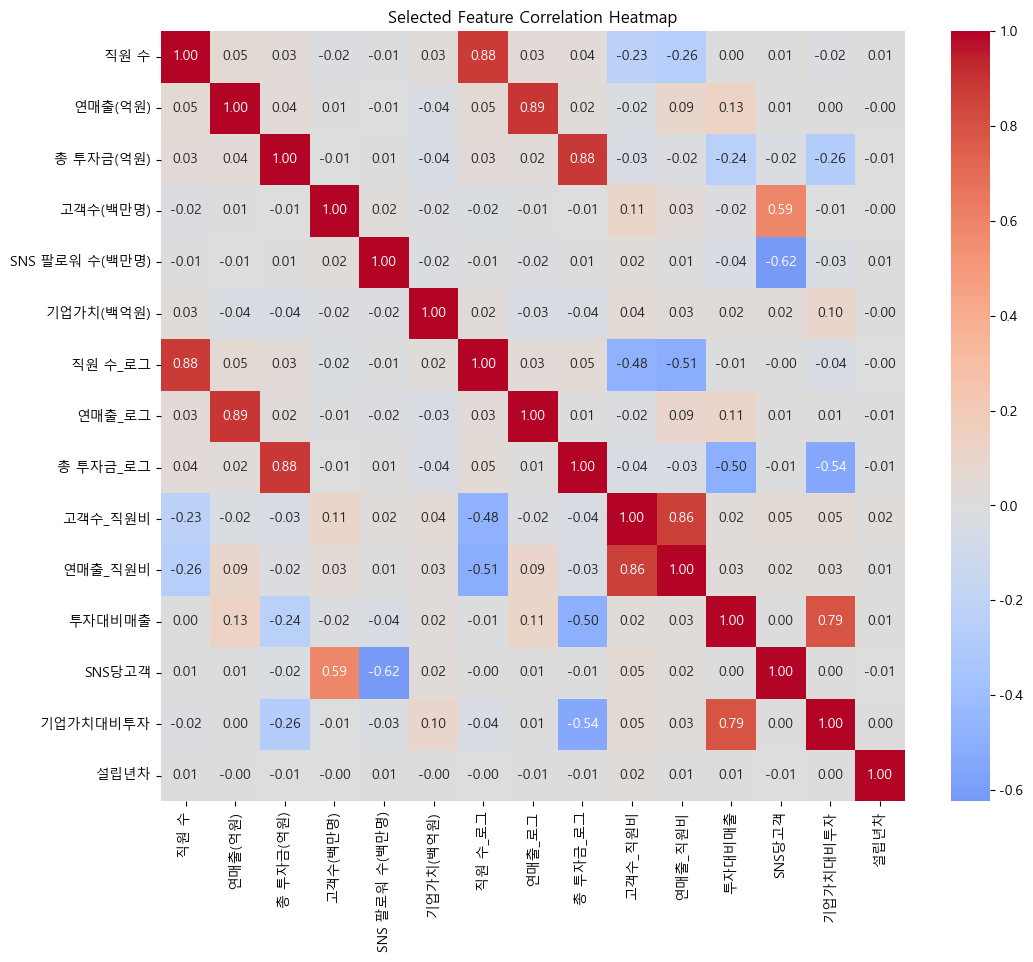

In [12]:
# Ïó∞ÏÜçÌòï Î≥ÄÏàò Í∞Ñ ÏÉÅÍ¥ÄÍ≥ÑÏàò
num_cols = [
    'ÏßÅÏõê Ïàò', 'Ïó∞Îß§Ï∂ú(ÏñµÏõê)', 'Ï¥ù Ìà¨ÏûêÍ∏à(ÏñµÏõê)', 'Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)', 
    'SNS ÌåîÎ°úÏõå Ïàò(Î∞±ÎßåÎ™Ö)', 'Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)', 
    'ÏßÅÏõê Ïàò_Î°úÍ∑∏', 'Ïó∞Îß§Ï∂ú_Î°úÍ∑∏', 'Ï¥ù Ìà¨ÏûêÍ∏à_Î°úÍ∑∏', 
    'Í≥†Í∞ùÏàò_ÏßÅÏõêÎπÑ', 'Ïó∞Îß§Ï∂ú_ÏßÅÏõêÎπÑ', 'Ìà¨ÏûêÎåÄÎπÑÎß§Ï∂ú',
    'SNSÎãπÍ≥†Í∞ù', 'Í∏∞ÏóÖÍ∞ÄÏπòÎåÄÎπÑÌà¨Ïûê', 'ÏÑ§Î¶ΩÎÖÑÏ∞®'
]
corr_matrix = X[num_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Selected Feature Correlation Heatmap")
plt.show()

 Ìï¥ÏÑù Ìè¨Ïù∏Ìä∏
‚úÖ Í∞ïÌïú ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (r ‚â• 0.8)
ÏßÅÏõê Ïàò ‚Üî ÏßÅÏõê Ïàò_Î°úÍ∑∏ (0.88)

Ïó∞Îß§Ï∂ú(ÏñµÏõê) ‚Üî Ïó∞Îß§Ï∂ú_Î°úÍ∑∏ (0.89)

Ï¥ù Ìà¨ÏûêÍ∏à(ÏñµÏõê) ‚Üî Ï¥ù Ìà¨ÏûêÍ∏à_Î°úÍ∑∏ (0.88)

‚û• Ïù¥Í±¥ Î°úÍ∑∏ ÌååÏÉùÎ≥ÄÏàòÍ∞Ä Ïûò ÏûëÎèôÌïòÍ≥† ÏûàÎã§Îäî ÎúªÏù¥Ïïº. Îã§Îßå, ÎÑàÎ¨¥ Ï§ëÎ≥µÎêòÎØÄÎ°ú Îëò Ï§ë ÌïòÎÇòÎßå ÏÇ¨Ïö©Ìï†ÏßÄ Í≥†Î†§Ìï¥ÎèÑ Ï¢ãÏïÑ.

‚úÖ ÏùòÎØ∏ ÏûàÎäî ÎπÑÏú® Î≥ÄÏàòÎì§
Ïó∞Îß§Ï∂ú_ÏßÅÏõêÎπÑ ‚Üî Ïó∞Îß§Ï∂ú_Î°úÍ∑∏: 0.86

Ìà¨ÏûêÎåÄÎπÑÎß§Ï∂ú ‚Üî Ïó∞Îß§Ï∂ú_ÏßÅÏõêÎπÑ: 0.79

‚û• ÎπÑÏú® ÌååÏÉùÎ≥ÄÏàòÎì§Ïù¥ Ïã§Ï†ú ÏàòÏπòÎ≥¥Îã§ Îçî Ïú†ÏùòÎØ∏Ìïú Ï†ïÎ≥¥Î•º Îã¥Í≥† ÏûàÏùÑ Í∞ÄÎä•ÏÑ± ÏûàÏùå ‚Üí Î™®Îç∏ ÌïôÏäµ Ïãú Í∏∞ÎåÄÎê®!

üîµ ÏùåÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (r ‚â§ -0.5)
SNSÎãπÍ≥†Í∞ù ‚Üî SNS ÌåîÎ°úÏõå Ïàò(Î∞±ÎßåÎ™Ö) (-0.62)

Ìà¨ÏûêÎåÄÎπÑÎß§Ï∂ú ‚Üî Ï¥ù Ìà¨ÏûêÍ∏à_Î°úÍ∑∏: (-0.50)

‚û• SNS Í∑úÎ™®Í∞Ä ÌÅ¥ÏàòÎ°ù Í≥†Í∞ù ÎåÄÎπÑ ÎπÑÏú®ÏùÄ Îñ®Ïñ¥ÏßÄÎäî Íµ¨Ï°∞, Í∑∏Î¶¨Í≥† Ìà¨ÏûêÍ∏à ÎßéÏùÑÏàòÎ°ù Ìö®Ïú® Îñ®Ïñ¥Ïßà ÏàòÎèÑ ÏûàÎã§Îäî Î∞òÏòÅ

‚úÖ Í≤∞Î°† Î∞è Îã§Ïùå Ïï°ÏÖò Ï†úÏïà
ÌååÏÉùÎ≥ÄÏàò Ïûò Íµ¨ÏÑ±Îê®, ÌäπÌûà ÎπÑÏú® Î≥ÄÏàòÎì§Ïù¥ ÌïµÏã¨ Ï†ïÎ≥¥Î•º Ïûò Ï∂îÏ∂úÌïú Í≤É Í∞ôÏïÑ.

Î°úÍ∑∏ÏôÄ ÏõêÎ≥∏ Î≥ÄÏàòÍ∞Ä ÎÑàÎ¨¥ ÎπÑÏä∑Ìïú Í≤ΩÏö∞Îäî VIF Îã§Ï§ëÍ≥µÏÑ†ÏÑ±ÎèÑ Í≥†Î†§Ìï¥ÏÑú Îëò Ï§ë ÌïòÎÇòÎßå Ïì∏ÏßÄ ÌåêÎã®Ìï¥ÎèÑ Ï¢ãÏïÑ.

ÏÑ§Î¶ΩÎÖÑÏ∞®Îäî Í±∞Ïùò Î™®Îì† Î≥ÄÏàòÎûë ÎèÖÎ¶ΩÏ†ÅÏù¥Îùº Ï¢ãÏùÄ Ï†ïÎ≥¥ÏõêÏù¥ Îê† Ïàò ÏûàÏñ¥.

Î∂àÌïÑÏöîÌïú Ïª¨Îüº Ï†úÍ±∞

üîç Ï†úÍ±∞ Í∏∞Ï§Ä Ï†úÏïà
Ï§ëÎ≥µ Ï†ïÎ≥¥

Î°úÍ∑∏ Î≥ÄÌôò Ï†Ñ ÏõêÎ≥ÄÏàò vs. Î°úÍ∑∏ Î≥ÄÌôò ÌõÑ Î≥ÄÏàò ‚Üí Îëò Îã§ Ïì∏ ÌïÑÏöîÎäî ÏóÜÏùå

Ïòà: ÏßÅÏõê Ïàò vs. ÏßÅÏõê Ïàò_Î°úÍ∑∏

Í∞ïÌïú Îã§Ï§ëÍ≥µÏÑ†ÏÑ± (VIFÍ∞Ä ÎÜíÏßÑ ÏïäÏßÄÎßå Ï°∞Ï†ï Ïó¨ÏßÄÎäî ÏûàÏùå)

ÎπÑÏä∑Ìïú Ï†ïÎ≥¥Î•º Îã¥ÏùÄ ÌååÏÉù Î≥ÄÏàòÎÅºÎ¶¨ Ï°∞Ï†ï

Ïòà: Ïó∞Îß§Ï∂ú(ÏñµÏõê) vs. Ïó∞Îß§Ï∂ú_Î°úÍ∑∏ vs. Ïó∞Îß§Ï∂ú_ÏßÅÏõêÎπÑ

Ï†ïÎ≥¥ Î∂ÄÏ°± / ÏòÅÌñ• ÎØ∏ÎØ∏

ÏãúÍ∞ÅÌôî, Î™®Îç∏ ÏÑ±Îä• Ïã§ÌóòÏÉÅ Í∏∞Ïó¨ÎèÑ ÎÇÆÏùÄ Î≥ÄÏàò


‚úÖ Ïú†ÏßÄ Ï∂îÏ≤ú Ïª¨Îüº

Ïª¨ÎüºÎ™Ö	Ïú†ÏßÄ Ïù¥Ïú†
ÏßÅÏõê Ïàò_Î°úÍ∑∏	Ïä§ÏºÄÏùº Ï°∞Ï†ïÎêú ÏàòÏπòÌòï Î≥ÄÏàòÎ°ú, ÏßÅÏõê ÏàòÎ≥¥Îã§ Î∂ÑÌè¨Í∞Ä ÏïàÏ†ïÏ†Å
Ïó∞Îß§Ï∂ú_Î°úÍ∑∏	Í≥†Î∂ÑÏÇ∞ ÏôÑÌôîÏö© Î≥ÄÌôò Î≥ÄÏàòÎ°ú Ïó∞Îß§Ï∂ú(ÏñµÏõê)Î≥¥Îã§ Î™®Îç∏Ïóê Ïú†Î¶¨
Ï¥ù Ìà¨ÏûêÍ∏à_Î°úÍ∑∏	ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú Î∂ÑÌè¨ ÏïàÏ†ïÌôîÏóê ÎèÑÏõÄ, ÏõêÎ≥ÄÏàò Ï†úÍ±∞ Í∞ÄÎä•
Í≥†Í∞ùÏàò_ÏßÅÏõêÎπÑ	Ï°∞ÏßÅ Ìö®Ïú®ÏÑ±(1Ïù∏Îãπ Í≥†Í∞ù Ïàò)ÏùÑ ÎÇòÌÉÄÎÉÑ
Ïó∞Îß§Ï∂ú_ÏßÅÏõêÎπÑ	ÎÖ∏Îèô ÏÉùÏÇ∞ÏÑ± ÏßÄÌëúÎ°ú Ìï¥ÏÑù Í∞ÄÎä•
Ìà¨ÏûêÎåÄÎπÑÎß§Ï∂ú	ÏûêÎ≥∏ Ìö®Ïú®ÏÑ± ÎπÑÏú®, ÌïµÏã¨ ÎπÑÏ¶àÎãàÏä§ ÏÑ±Í≥º ÏßÄÌëú
SNSÎãπÍ≥†Í∞ù	Î∏åÎûúÎìú ÌååÏõåÎÇò Ïù∏ÏßÄÎèÑ Í¥ÄÎ†® Î≥ÄÏàò Í∞ÄÎä•ÏÑ±
Í∏∞ÏóÖÍ∞ÄÏπòÎåÄÎπÑÌà¨Ïûê	Ìà¨Ïûê Ìö®Ïú®ÏÑ± (Ìà¨Ïûê ÎåÄÎπÑ Í∏∞ÏóÖÍ∞ÄÏπò) ÎπÑÍµêÏö©
ÏÑ§Î¶ΩÎÖÑÏ∞®	ÏãúÍ∞ÑÏóê Îî∞Î•∏ ÏÑ±Ïû•/ÏïàÏ†ïÏÑ± Ï∏°Ï†ï Í∞ÄÎä• Î≥ÄÏàò
Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)	ÌÉÄÍπÉÍ≥º Í¥ÄÍ≥Ñ ÎÜíÏùÑ Ïàò ÏûàÎäî ÌïµÏã¨ Ïû¨Î¨¥ ÏßÄÌëú
üîª Ï†úÍ±∞ Ï∂îÏ≤ú Ïª¨Îüº

Ïª¨ÎüºÎ™Ö	Ï†úÍ±∞ Ïù¥Ïú†
ÏßÅÏõê Ïàò	ÏßÅÏõê Ïàò_Î°úÍ∑∏, ÏßÅÏõêÎπÑ Í≥ÑÏó¥ ÌååÏÉùÎ≥ÄÏàòÎ°ú Ï∂©Î∂ÑÌûà ÎåÄÏ≤¥ Í∞ÄÎä•
Ïó∞Îß§Ï∂ú(ÏñµÏõê)	Î°úÍ∑∏ Î∞è ÎπÑÏú® ÌååÏÉùÎ≥ÄÏàòÍ∞Ä ÎåÄÏ≤¥ Í∞ÄÎä•ÌïòÎ©∞, Í∑∏ÎåÄÎ°ú ÎëêÎ©¥ Ï§ëÎ≥µ Ï†ïÎ≥¥
Ï¥ù Ìà¨ÏûêÍ∏à(ÏñµÏõê)	ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú Î°úÍ∑∏ Î∞è ÌååÏÉùÎ≥ÄÏàòÎ°ú ÎåÄÏ≤¥ Í∞ÄÎä•
ÏßÅÏõê Ïàò_Í≤∞Ï∏°, Í≥†Í∞ùÏàò_Í≤∞Ï∏°	Í≤∞Ï∏°Ïπò Î≥¥Í∞ÑÏùÑ ÎßàÏ≥§Í≥†, Ïù¥ÏÉÅÏπò ÌîåÎûòÍ∑∏Î°ú ÎåÄÏ≤¥ÎêòÏóàÏùÑ Í∞ÄÎä•ÏÑ± ÎÜíÏùå
(Î≥¥Í∞Ñ Ï†Ñ ÌîåÎûòÍ∑∏ÎùºÎ©¥ Ïú†ÏßÄ Í≥†Î†§ Í∞ÄÎä•)
‚ö†Ô∏è Î≥¥Î•ò ÎòêÎäî ÌôïÏù∏ ÌïÑÏöî

Ïª¨ÎüºÎ™Ö	ÏÑ§Î™Ö
Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)_Í≤∞Ï∏°_Ïù¥ÏÉÅÏπòÏó¨Î∂Ä Îì± ÌîåÎûòÍ∑∏ Î≥ÄÏàòÎì§	Î™®Îç∏ ÏÑ±Îä• Í∏∞Ïó¨ÎèÑ Ïã§Ìóò ÌõÑ Ïú†ÏßÄ/Ï†úÍ±∞ Í≤∞Ï†ï ÌïÑÏöî
SNS ÌåîÎ°úÏõå Ïàò(Î∞±ÎßåÎ™Ö)	SNSÎãπÍ≥†Í∞ùÍ≥º Ï§ëÎ≥µ Í∞ÄÎä•ÏÑ± ÏûàÏßÄÎßå ÏõêÎ≥ÄÏàò ÏûêÏ≤¥Ïùò ÏòàÏ∏°Î†• ÌôïÏù∏ ÌõÑ Í≤∞Ï†ï

In [ ]:
ols_to_drop = [
    'ÏßÅÏõê Ïàò', 'Ïó∞Îß§Ï∂ú(ÏñµÏõê)', 
    'ÏßÅÏõê Ïàò_Í≤∞Ï∏°', 'Í≥†Í∞ùÏàò_Í≤∞Ï∏°', 'ÏÑ§Î¶ΩÏó∞ÎèÑ'
    ,'Ï¥ù Ìà¨ÏûêÍ∏à(ÏñµÏõê)'
]

existing_cols_to_drop = [col for col in ols_to_drop if col in X.columns]
X = X.drop(columns=existing_cols_to_drop)

y = train_processed['ÏÑ±Í≥µÌôïÎ•†']  # ÎòêÎäî ÎØ∏Î¶¨ Î∂ÑÎ¶¨Ìïú y ÏÇ¨Ïö©

# 'ÏÑ±Í≥µÌôïÎ•†' Ïª¨ÎüºÏù¥ ÏûàÎã§Î©¥ ÏÇ≠Ï†ú
if 'ÏÑ±Í≥µÌôïÎ•†' in X.columns:
    X = X.drop(columns=['ÏÑ±Í≥µÌôïÎ•†'])

# y Í≤∞Ìï©
X_with_y = X.join(y.rename("ÏÑ±Í≥µÌôïÎ•†"))

# Ïà´ÏûêÌòïÎßå ÎÇ®Í∏∞Í≥† ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
X_with_y_numeric = X_with_y.select_dtypes(include=['number'])
cor_target = X_with_y_numeric.corr()['ÏÑ±Í≥µÌôïÎ•†'].sort_values(key=abs, ascending=False)

print(cor_target.head(15))


ÏÑ±Í≥µÌôïÎ•†              1.000000
Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)_Í≤∞Ï∏°      0.031870
ÏÉÅÏû•Ïó¨Î∂Ä              0.031413
Íµ≠Í∞Ä                0.029570
Î∂ÑÏïº               -0.026773
ÏßÅÏõê Ïàò_Î°úÍ∑∏          -0.022390
SNS ÌåîÎ°úÏõå Ïàò(Î∞±ÎßåÎ™Ö)    0.017927
Ìà¨ÏûêÎåÄÎπÑÎß§Ï∂ú           -0.014528
Ïó∞Îß§Ï∂ú_Î°úÍ∑∏           -0.013664
Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)_Í≤∞Ï∏°       0.013620
Ï¥ù Ìà¨ÏûêÍ∏à_Î°úÍ∑∏         -0.012281
Ïù∏ÏàòÏó¨Î∂Ä             -0.012065
Í≥†Í∞ùÏàò_ÏßÅÏõêÎπÑ           0.011265
Ïó∞Îß§Ï∂ú_ÏßÅÏõêÎπÑ           0.009336
ÏßÅÏõê Ïàò_Í≤∞Ï∏°_Ïù¥ÏÉÅÏπòÏó¨Î∂Ä     0.008724
Name: ÏÑ±Í≥µÌôïÎ•†, dtype: float64


Î™®Îç∏

Series([], dtype: object)
Fold 1
Fold 1 MAE: 0.1960
Fold 2
Fold 2 MAE: 0.1965
Fold 3
Fold 3 MAE: 0.1980
Fold 4
Fold 4 MAE: 0.1973
Fold 5
Fold 5 MAE: 0.1984


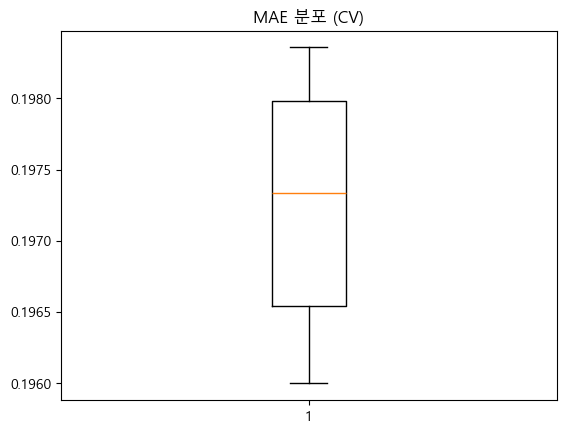


Average MAE across folds: 0.19724

‚úÖ Test ÏòàÏ∏° ÏôÑÎ£å (KFold Î™®Îç∏ ÌèâÍ∑†)
[0.5154838  0.49997205 0.43567848 0.49823636 0.6366044  0.504871
 0.37872007 0.57222146 0.594799   0.58554333]


In [23]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from catboost import CatBoostRegressor, Pool
from xgboost import XGBRegressor
import random
from sklearn.model_selection import StratifiedKFold
random.seed(42)
np.random.seed(42)
X_test = test_processed.copy()
X_test = create_features(X_test)
cols_to_drop = ['ÏßÅÏõê Ïàò', 'Ïó∞Îß§Ï∂ú(ÏñµÏõê)','ÏßÅÏõê Ïàò_Í≤∞Ï∏°', 'Í≥†Í∞ùÏàò_Í≤∞Ï∏°', 'ÏÑ§Î¶ΩÏó∞ÎèÑ'
                #  ,'Ï¥ù Ìà¨ÏûêÍ∏à(ÏñµÏõê)'
                 ]
X_test = X_test.drop(columns=cols_to_drop, errors='ignore')
X_test = X_test[X.columns]

# kf = KFold(n_splits=5, shuffle=True, random_state=42)
# cv_scores = []
# models = []
# test_preds = []

categorical_features = ['Íµ≠Í∞Ä', 'Î∂ÑÏïº', 'Ìà¨ÏûêÎã®Í≥Ñ']  # ÌïÑÏöîÏãú Ïã§Ï†ú Î≤îÏ£ºÌòï Ïª¨Îüº Ïù¥Î¶ÑÏúºÎ°ú ÏàòÏ†ï
for col in ['Ïù∏ÏàòÏó¨Î∂Ä', 'ÏÉÅÏû•Ïó¨Î∂Ä']:
    X[col] = X[col].map({'No': 0, 'Yes': 1})
    X_test[col] = X_test[col].map({'No': 0, 'Yes': 1})  # testÏóêÎèÑ ÎèôÏùºÌïòÍ≤å Ï†ÅÏö©

print(X.dtypes[X.dtypes == 'object'])

bins = np.linspace(0, 1, 6)
y_binned = np.digitize(y, bins)

# StratifiedKFold Ï†ÅÏö©
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []
models = []
test_preds = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y_binned)):
    print(f"Fold {fold+1}")
    X_tr, y_tr = X.iloc[train_idx], y.iloc[train_idx]
    X_val, y_val = X.iloc[val_idx], y.iloc[val_idx]

    # model = CatBoostRegressor(
    #     iterations=1000,
    #     learning_rate=0.05,
    #     depth=6,
    #     cat_features=categorical_features,
    #     random_state=42,
    #     early_stopping_rounds=50,
    #     verbose=100
    # )
    # model.fit(X_tr, y_tr, eval_set=(X_val, y_val))
    model = XGBRegressor(
        n_estimators=500,
        learning_rate=0.03,
        max_depth=15,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1
    )
    model.fit(X_tr, y_tr)


    

    y_pred = model.predict(X_val)
    mae = mean_absolute_error(y_val, y_pred)
    cv_scores.append(mae)
    models.append(model)

    test_preds.append(model.predict(X_test))
    print(f"Fold {fold+1} MAE: {mae:.4f}")

plt.boxplot(cv_scores)
plt.title("MAE Î∂ÑÌè¨ (CV)")
plt.show()

print(f"\nAverage MAE across folds: {np.mean(cv_scores):.5f}")

final_test_pred = np.mean(test_preds, axis=0)

# test_preds = np.zeros(len(X_test))

# for model in models:
#     test_preds += model.predict(X_test) / kf.get_n_splits()

# final_preds = test_preds

print("\n‚úÖ Test ÏòàÏ∏° ÏôÑÎ£å (KFold Î™®Îç∏ ÌèâÍ∑†)")
print(final_test_pred[:10])


In [15]:

sample_submission['ÏÑ±Í≥µÌôïÎ•†'] = final_test_pred
sample_submission.to_csv('submission_xgb_kfold1.csv', index=False, encoding='utf-8-sig')
print("üìÅ submission_xgb_kfold1.csv Ï†ÄÏû• ÏôÑÎ£å!")
sample_submission.head()

üìÅ submission_xgb_kfold1.csv Ï†ÄÏû• ÏôÑÎ£å!


ID      ÏÑ±Í≥µÌôïÎ•†
0  TEST_0000  0.507422
1  TEST_0001  0.493070
2  TEST_0002  0.445628
3  TEST_0003  0.527575
4  TEST_0004  0.641360

Ï†êÏàò : 0.2139192132

Îä• Ìñ•ÏÉÅÏùÑ ÏúÑÌïú Ïã§Ï†Ñ Ï†ÑÎûµ
Ï†ÑÎûµ	ÏÑ§Î™Ö
‚úÖ ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù (Optuna)	ÏûêÎèô ÏµúÏ†ÅÌôî ÎèÑÍµ¨Î°ú XGBoostÏùò depth, eta, colsample_bytree Îì±ÏùÑ Ï°∞Ï†ï
‚úÖ ÌååÏÉùÎ≥ÄÏàò Ï∂îÍ∞Ä	Ïòà: Ïó∞Îß§Ï∂ú ÎåÄÎπÑ SNS, Ï¥ù Ìà¨ÏûêÍ∏à ÎåÄÎπÑ Í≥†Í∞ùÏàò Îì± ÎèÑÎ©îÏù∏ ÏßÄÏãùÏùÑ Î∞òÏòÅÌïú Î≥ÄÏàò
‚úÖ Î™®Îç∏ ÏïôÏÉÅÎ∏î	XGBoost + LightGBM + CatBoost ‚Üí ÌèâÍ∑† ÎòêÎäî Í∞ÄÏ§ë ÏïôÏÉÅÎ∏î
‚úÖ Target Encoding (Î≤îÏ£ºÌòï Í≥†Í∏â Ï≤òÎ¶¨)	Î≤îÏ£ºÌòï Î≥ÄÏàò ‚Üí ÏÑ±Í≥µÌôïÎ•† ÌèâÍ∑†ÏúºÎ°ú ÏπòÌôò (KFold ÎÇ¥ÏóêÏÑú Ï°∞Ïã¨Ìûà Ï†ÅÏö©)
‚úÖ Ïù¥ÏÉÅÏπò Ï†úÍ±∞ or Robust Loss ÏÇ¨Ïö©	MAE Í∏∞Î∞òÏù¥Í∏¥ ÌïòÏßÄÎßå, Í∑πÎã®Í∞í ÎßéÏùÄ Í≤ΩÏö∞ Robust Regression Ìö®Í≥º ÏûàÏùå
‚úÖ Pseudo Labeling	Test ÏòàÏ∏° Ï§ë ÏûêÏã† ÏûàÎäî ÏÉÅÏúÑ 10%Î•º TrainÏóê Ìè¨Ìï®Ìï¥ Ïû¨ÌïôÏäµ
‚úÖ SHAP Î∂ÑÏÑù ÌõÑ Feature Selection	ÏòÅÌñ•Î†•Ïù¥ Í±∞Ïùò ÏóÜÎäî Î≥ÄÏàò Ï†úÍ±∞ ‚Üí Î™®Îç∏ Í∞ÑÍ≤∞Ìôî Î∞è ÏùºÎ∞òÌôî Ìñ•ÏÉÅ


Ïû¨Ìï¥ÏÑù

Ï†êÏàò : 0.2142341493	
Îçî ÏïàÏ†ïÏ†ÅÏù∏ mae Í≤∞Í≥º ÏùòÎØ∏ÏûàÎäî ÌååÏÉùÎ≥ÄÏàò Îçî Ï∂îÍ∞Ä